<a href="https://colab.research.google.com/github/imams12/Kuliah/blob/main/Kmeans_DBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mengakses google drive ke dalam google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import Library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import os

In [4]:
# Inisiasi directory tempat data akan dibaca dan disimpan
path = "gdrive/MyDrive/Tugas/" #silahkan masukkan path sesuai dengan letak data di drive masing-masing

In [5]:
os.listdir(path)

['Data DBD Jateng 2016.xlsx', 'DBD.csv']

In [7]:
# Membaca file excel
data_DBD = pd.read_excel(path + "Data DBD Jateng 2016.xlsx")
data_DBD

,Kabupaten/Kodya,Jan,Feb,Mar,April,Mei,Juni,Juli,Agt,Sep,Okt,Nop,Des
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10


In [8]:
# Mencari ukuran data
data_DBD.shape

(35, 13)

In [9]:
# Melihat Informasi Data
data_DBD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kabupaten/Kodya  35 non-null     object
 1   Jan              35 non-null     int64 
 2   Feb              35 non-null     int64 
 3   Mar              35 non-null     int64 
 4   April            35 non-null     int64 
 5   Mei              35 non-null     int64 
 6   Juni             35 non-null     int64 
 7   Juli             35 non-null     int64 
 8   Agt              35 non-null     int64 
 9   Sep              35 non-null     int64 
 10  Okt              35 non-null     int64 
 11  Nop              35 non-null     int64 
 12  Des              35 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 3.7+ KB


In [11]:
X = data_DBD.loc[:,['Jan','Feb','Mar','April','Mei','Juni','Juli','Agt','Sep','Okt','Nop','Des']].values

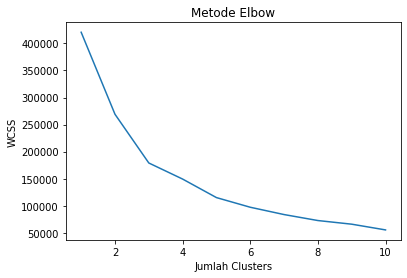

In [12]:
#Menggunakan metode elbow untuk menentukan angka cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#Berdasarkan metode elbow, jumlah cluster yang terbaik yaitu 2,3,atau 5
#Dipilih 3 cluster. Akan dibentuk cluster
plt.savefig(path + 'Metode Elbow.png')

<Figure size 432x288 with 0 Axes>

In [17]:
os.listdir(path)

['Data DBD Jateng 2016.xlsx', 'DBD.csv', 'Metode Elbow.png']

In [18]:
#Menjalankan K-Means Clustering ke dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [19]:
print(kmeans.cluster_centers_)

[[ 26.05555556  31.61111111  35.61111111  32.5         29.33333333
   22.5         18.72222222  12.72222222   7.61111111  10.16666667
    7.27777778   7.33333333]
 [252.         177.          21.5         14.          17.
   11.          25.5         18.5         17.5         16.5
   19.          15.        ]
 [ 71.26666667 106.26666667  80.86666667  92.2         68.33333333
   41.13333333  34.2         21.8         11.73333333  23.4
   19.26666667  17.6       ]]


In [20]:
#Menampilkan hasil klaster
print(kmeans.labels_)

#Menambahkan kolom "Klaster" dalam data frame rekap nilai
data_DBD['Cluster']=kmeans.labels_
data_DBD

[2 2 0 0 0 0 0 0 2 2 0 0 0 2 2 1 1 2 2 2 2 2 0 2 2 0 2 0 2 0 0 0 0 0 0]


,Kabupaten/Kodya,Jan,Feb,Mar,April,Mei,Juni,Juli,Agt,Sep,Okt,Nop,Des,Cluster
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16,2
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15,2
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13,0
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13,0
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13,0
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12,0
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0,0
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7,0
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4,2
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10,2


In [22]:
# Export data kedalam format csv
data_DBD.to_csv(path + 'Hasil Cluster.csv', index=None)

In [23]:
# Export data kedalam format excel
data_DBD.to_excel(path + 'Hasil Cluster.xlsx', index=None)

In [24]:
os.listdir(path)

['Data DBD Jateng 2016.xlsx',
 'DBD.csv',
 'Metode Elbow.png',
 'Hasil Cluster.csv',
 'Hasil Cluster.xlsx']

In [25]:
cluster_satu=data_DBD[(data_DBD['Cluster']==0)]
cluster_satu

,Kabupaten/Kodya,Jan,Feb,Mar,April,Mei,Juni,Juli,Agt,Sep,Okt,Nop,Des,Cluster
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13,0
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13,0
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13,0
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12,0
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0,0
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7,0
10,SUKOHARJO,13,21,43,52,61,31,26,16,7,11,5,3,0
11,WONOGIRI,20,8,2,11,3,1,2,1,1,2,0,1,0
12,KARANGANYAR,22,35,44,75,45,39,66,43,31,25,12,10,0
22,TEMANGGUNG,45,48,45,50,33,43,46,90,14,16,14,14,0


In [26]:
cluster_dua=data_DBD[(data_DBD['Cluster']==1)]
cluster_dua

,Kabupaten/Kodya,Jan,Feb,Mar,April,Mei,Juni,Juli,Agt,Sep,Okt,Nop,Des,Cluster
15,BLORA,282,204,25,15,8,9,6,12,9,17,10,13,1
16,REMBANG,222,150,18,13,26,13,45,25,26,16,28,17,1


In [27]:
cluster_tiga=data_DBD[(data_DBD['Cluster']==2)]
cluster_tiga

,Kabupaten/Kodya,Jan,Feb,Mar,April,Mei,Juni,Juli,Agt,Sep,Okt,Nop,Des,Cluster
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16,2
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15,2
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4,2
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10,2
13,SRAGEN,56,100,110,110,71,46,20,16,9,20,19,16,2
14,GROBOGAN,120,132,152,10,42,31,47,41,44,49,46,38,2
17,PATI,89,116,121,43,25,16,41,23,11,59,19,31,2
18,KUDUS,55,157,108,116,96,49,18,16,8,29,8,10,2
19,JEPARA,139,133,110,99,65,33,39,16,16,17,14,28,2
20,DEMAK,76,56,20,118,73,43,73,44,25,38,39,35,2


In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

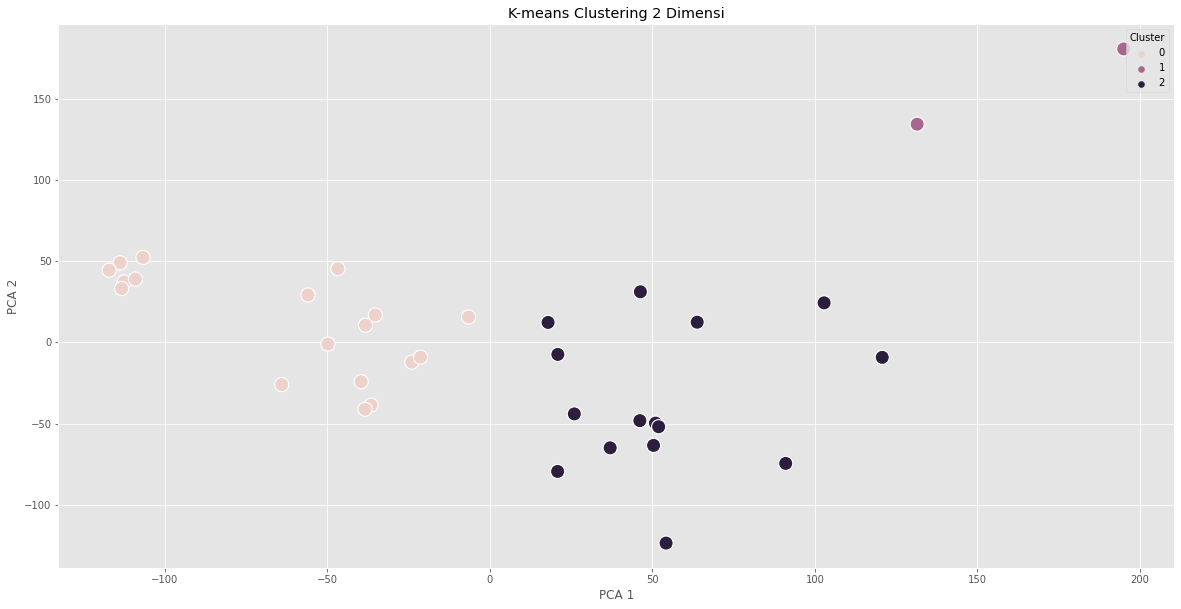

In [36]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['PCA 1','PCA 2'])

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="PCA 1", y="PCA 2", hue=data_DBD['Cluster'], data=results, s=200)
plt.title('K-means Clustering 2 Dimensi')

plt.show()

In [37]:
plt.savefig(path + 'K-means Clustering 2 Dimensi.png')

<Figure size 432x288 with 0 Axes>

In [38]:
os.listdir(path)

['Data DBD Jateng 2016.xlsx',
 'DBD.csv',
 'Metode Elbow.png',
 'Hasil Cluster.csv',
 'Hasil Cluster.xlsx',
 'K-means Clustering 2 Dimensi.png']